## Observations and Insights

1. Capomulin and Ramicane had the most Data Points (Tumor Volume (mm3) count) of 230 and 228 respectively.
2. The Female and Male mice were almost equally distributed in the study with Female at 49.8% and Male at 50.2%.
3. There is negative correlation between time point and tumor volume for Mouse ID - b128 treated with Capomulin which indicates    that at higher timepoint less tumors were treated in that mouse.
4. The correlation between mouse weight and tumor volume treated by Capomulin is 0.84. It indicates positive correlation between mouse weight and average tumor volume among all mice.
5. Most values are far from the slope (Linear regression Model) which indicates the outliers in data.


# Note:
- I have plotted Mouse Weight versus Average Tumor Volume (mm3) in two ways.   1) Plot 1 is where the x-axis is Weight (g)
2) Plot 2 is where the x-axis is Average Tumor Volume (mm3)

- Per my understanding since the ask is 'Mouse Weight versus Average Tumor Volume (mm3)', the x-axis should be Tumor Volume (mm3) - Plot 2.
- I have also calculated Correlation (same for both ways), Linear Regression and plotted the line (different slope) on the scatter plots for both methods.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"



In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results = pd.read_csv(study_results)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how= "outer")
Combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
Data_Statistics = Combined_data.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
Data_Statistics

mean      50.448381
median    48.951474
var       79.116074
std        8.894722
sem        0.204436
Name: Tumor Volume (mm3), dtype: float64

## Summary statistics

In [6]:
Grouped_data = Combined_data.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
Grouped_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
Grouped_data.columns

Index(['mean', 'median', 'var', 'std', 'sem'], dtype='object')

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Updated the formatting

Grouped_data.rename(columns={'mean':'Mean', 'median':'Median', 
                             'var':'Variance', 'std': 'Standard Deviation', 
                             'sem': 'SEM'}, inplace= True)
Grouped_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [9]:
Data_points = Combined_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)'].sort_values(ascending=False)
Data_points = pd.DataFrame(Data_points)
Data_points

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


Text(0, 0.5, 'Number of Data Points')

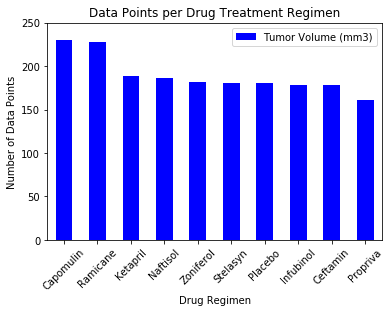

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

ax = Data_points.plot.bar(rot=45,legend= True, color = 'blue')

ax.set_alpha(0.55)
ax.set_ylim(0,250)
ax.set_title("Data Points per Drug Treatment Regimen")
ax.set_ylabel("Number of Data Points")




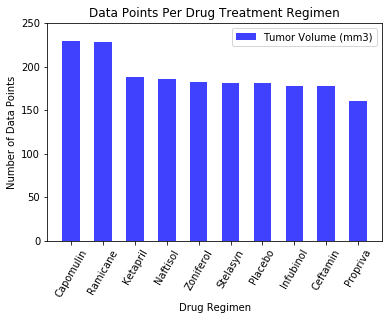

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(Data_points))
tick_locations = [x for x in x_axis]

plt.figure(figsize = (6,4))

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


new_index = Data_points.reset_index()
new_index
plt.bar(x_axis, Data_points['Tumor Volume (mm3)'] , facecolor="blue", label = 'Tumor Volume (mm3)',
        alpha=0.75, align="center", width = 0.55)
plt.xticks(tick_locations, new_index['Drug Regimen'], rotation=60)
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, 250)
plt.legend()

plt.show()

## Pie plots

In [12]:
By_Gender = pd.DataFrame(Combined_data.groupby("Sex").nunique()["Mouse ID"])
By_Gender

,Mouse ID
Sex,
Female,124
Male,125


In [13]:
# Setting the basics:

labels = [Combined_data["Sex"].unique()]
newcolumns = By_Gender.index
colors = ["pink", "blue"]
legend = ['Female', 'Male']


Text(0.5, 1.0, 'Female versus Male Mice Distribution')

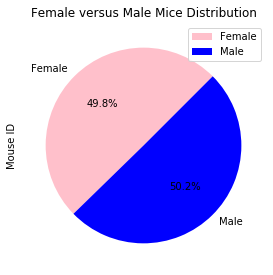

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

ax1 = By_Gender.plot.pie(y ="Mouse ID", figsize=(4.5,4.5), autopct="%1.1f%%",startangle=45,
                                            colors = colors, legend = True)
ax1.set_title('Female versus Male Mice Distribution')



C:\Users\angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


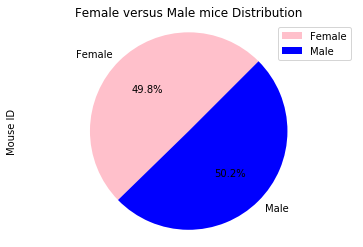

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(By_Gender, labels=newcolumns, colors=colors, autopct="%1.1f%%", shadow=False, startangle=45)
plt.legend()
plt.title('Female versus Male mice Distribution')
plt.ylabel('Mouse ID')
plt.axis('equal')
plt.show()

## Quartiles, outliers and boxplots

In [16]:
Cap_1 = Combined_data.loc[Combined_data["Drug Regimen"] == "Capomulin",:]
Cap_1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [17]:
Mouse_last_timept_Cap = Cap_1.groupby('Mouse ID').max()['Timepoint']
Data_Cap= pd.DataFrame(Mouse_last_timept_Cap)
Data_Cap

,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45
i557,45
i738,45
j119,45
j246,35


In [18]:
Ram_2 = Combined_data.loc[Combined_data["Drug Regimen"] == "Ramicane",:]
Ram_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [19]:
Mouse_last_timept_Ram = Ram_2.groupby('Mouse ID').max()['Timepoint']
Data_Ram= pd.DataFrame(Mouse_last_timept_Ram)
Data_Ram



,Timepoint
Mouse ID,
a411,45
a444,45
a520,45
a644,45
c458,30
c758,45
d251,45
e662,45
g791,45


In [20]:
Infu_3 = Combined_data.loc[Combined_data["Drug Regimen"] == "Infubinol",:]
Infu_3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [21]:
Mouse_last_timept_Infu = Infu_3.groupby('Mouse ID').max()['Timepoint']
Data_Infu= pd.DataFrame(Mouse_last_timept_Infu)
Data_Infu

,Timepoint
Mouse ID,
a203,45
a251,45
a577,30
a685,45
c139,45
c326,5
c895,30
e476,45
f345,45


In [22]:
Ceft_4 = Combined_data.loc[Combined_data["Drug Regimen"] == "Ceftamin",:]
Ceft_4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [23]:
Mouse_last_timept_Ceft = Ceft_4.groupby('Mouse ID').max()['Timepoint']
Data_Ceft= pd.DataFrame(Mouse_last_timept_Ceft)
Data_Ceft

,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15
h531,5
j296,45
k210,45
l471,45


In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# Capomulin Final Tumor Volume:

Cap_Final_Tumor_Vol = pd.merge (Data_Cap,Combined_data, on = ("Mouse ID","Timepoint"), how="left")
Cap_Final_Tumor_Vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [25]:
# Ramicane Final Tumor Volume:

Ram_Final_Tumor_Vol = pd.merge (Data_Ram,Combined_data, on = ("Mouse ID","Timepoint"), how="left")
Ram_Final_Tumor_Vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [26]:
# Infubinol Final Tumor Volume:

Infu_Final_Tumor_Vol = pd.merge (Data_Infu,Combined_data, on = ("Mouse ID","Timepoint"), how="left")
Infu_Final_Tumor_Vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [27]:
# Ceftamin Final Tumor Volume:

Ceft_Final_Tumor_Vol = pd.merge (Data_Ceft,Combined_data, on = ("Mouse ID","Timepoint"), how="left")
Ceft_Final_Tumor_Vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [28]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

Cap = Cap_Final_Tumor_Vol["Tumor Volume (mm3)"]

quartiles3 = Cap.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
IQR3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

print(f'Potential Outliers for Capomulin will be any values Lower than: {lower_bound3} and Upper than: {upper_bound3}')

Potential Outliers for Capomulin will be any values Lower than: 20.70456164999999 and Upper than: 51.83201549


In [29]:
Ram = Ram_Final_Tumor_Vol["Tumor Volume (mm3)"]

quartiles2 = Ram.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
IQR2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

print(f'Potential Outliers for Ramicane will be any values Lower than: {lower_bound2} and Upper than: {upper_bound2}')

Potential Outliers for Ramicane will be any values Lower than: 17.912664470000003 and Upper than: 54.30681135


In [30]:


Infu = Infu_Final_Tumor_Vol["Tumor Volume (mm3)"]

quartiles1 = Infu.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
IQR1 = upperq1-lowerq1

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)


print(f'Potential Outliers for Infubinol will be any values Lower than: {lower_bound1} and Upper than: {upper_bound1}')


Potential Outliers for Infubinol will be any values Lower than: 36.83290494999999 and Upper than: 82.74144559000001


In [31]:
Ceft = Ceft_Final_Tumor_Vol["Tumor Volume (mm3)"]

quartiles4 = Ceft.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
IQR4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*IQR4)
upper_bound4 = upperq4 + (1.5*IQR4)

print(f'Potential Outliers for Ceftamin will be values Lower than: {lower_bound4} and Upper than: {upper_bound4}')

Potential Outliers for Ceftamin will be values Lower than: 25.355449580000002 and Upper than: 87.66645829999999


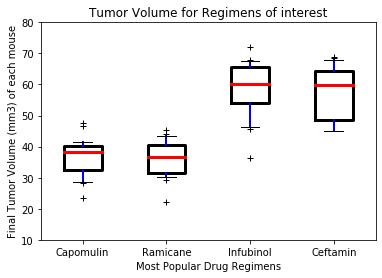

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Box_plot_data = [Cap, Ram, Infu, Ceft]
medianprops = {'color': 'red', 'linewidth': 3}
boxprops = {'color': 'black', 'linestyle': '-', 'linewidth': 3}
whiskerprops = {'color': 'blue', 'linestyle': '-','linewidth':2}
capprops = {'color': 'black', 'linestyle': '-'}
flierprops = {'color': 'blue'}
whis = (5,95)
labels = ["Capomulin","Ramicane","Infubinol","Ceftamin",]

plt.boxplot(Box_plot_data, sym='+', whis = whis, labels = labels, showcaps=True, showbox=True, showfliers = True,
           capprops = capprops, boxprops = boxprops, whiskerprops = whiskerprops, 
            medianprops=medianprops, flierprops=flierprops)
plt.ylim(10,80)
plt.title('Tumor Volume for Regimens of interest')
plt.ylabel('Final Tumor Volume (mm3) of each mouse')
plt.xlabel('Most Popular Drug Regimens')

plt.show()

## Line and scatter plots

In [33]:
Timept_1mouse = Cap_1.loc[Cap_1["Mouse ID"] == "b128"]
Timept_1mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


(-5, 50)

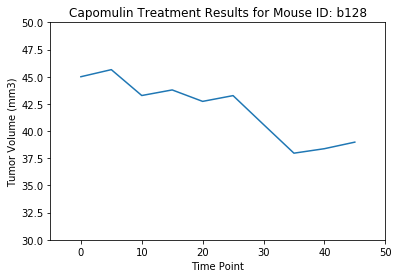

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axis = Timept_1mouse["Timepoint"]
Tumor_Vol = Timept_1mouse["Tumor Volume (mm3)"]
fig2, ax1= plt.subplots()

ax1.plot(x_axis, Tumor_Vol)
ax1.set_title('Capomulin Treatment Results for Mouse ID: b128')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Time Point')
ax1.set_ylim(30,50)
ax1.set_xlim(-5,50)




In [35]:
Avg_Cap_TVol = Cap_1.groupby("Mouse ID").mean()
Avg_Cap_TVol

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


Text(0.5, 0, 'Weight (g)')

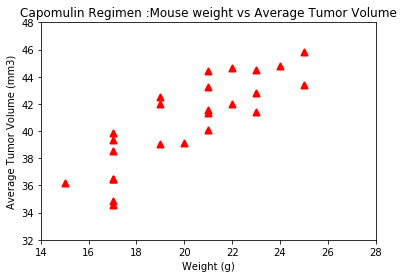

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Plot 1

x_axis1 = Avg_Cap_TVol["Weight (g)"]
Tumor_Vol2 = Avg_Cap_TVol["Tumor Volume (mm3)"]

fig3, ax2= plt.subplots()
ax2.scatter(x_axis1, Tumor_Vol2, marker="^",  color="red",linewidth="2")

ax2.set_xlim(14,28)
ax2.set_ylim(32,48)
ax2.set_title('Capomulin Regimen :Mouse weight vs Average Tumor Volume')
ax2.set_ylabel('Average Tumor Volume (mm3)')
ax2.set_xlabel('Weight (g)')




In [38]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

Correlation = (round(st.pearsonr(Avg_Cap_TVol['Weight (g)'],Avg_Cap_TVol['Tumor Volume (mm3)'])[0],2))
print(f"The correlation coefficient between mouse weight and average tumor volume is {Correlation}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


In [39]:
# linear regression model:
Lingress_model = st.linregress(Avg_Cap_TVol['Weight (g)'],Avg_Cap_TVol['Tumor Volume (mm3)'])
Lingress_model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

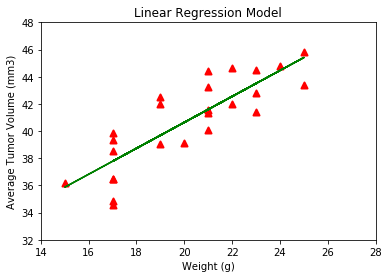

In [48]:
m = 0.9544396890241045
b = 21.552160532685015
x = Avg_Cap_TVol['Weight (g)']

y = m*x + b

x_axis3 = Avg_Cap_TVol["Weight (g)"]
Tumor_Vol3 = Avg_Cap_TVol["Tumor Volume (mm3)"]



fig4, ax3= plt.subplots()
ax3.set_title('Linear Regression Model')
ax3.set_ylabel('Average Tumor Volume (mm3)')
ax3.set_xlabel('Weight (g)')
ax3.set_xlim(14,28)
ax3.set_ylim(32,48)

ax3.scatter(x_axis3, Tumor_Vol3, marker="^", linewidth="2", color="red")
ax3.plot(Avg_Cap_TVol['Weight (g)'],y,color="green")


Text(0.5, 0, 'Average Tumor Volume (mm3)')

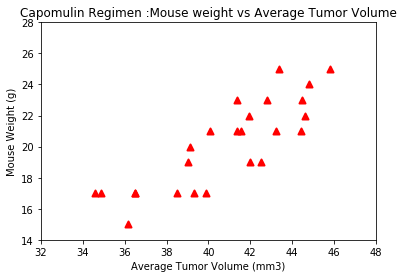

In [42]:
# Second way to show the scatter plot
# Plot 2

x_axis1 = Avg_Cap_TVol["Tumor Volume (mm3)"]
Weight = Avg_Cap_TVol["Weight (g)"]

fig3, ax2= plt.subplots()
ax2.scatter(x_axis1, Weight, marker="^",  color="red",linewidth="2")

ax2.set_xlim(32,48)
ax2.set_ylim(14,28)
ax2.set_title('Capomulin Regimen :Mouse weight vs Average Tumor Volume')
ax2.set_ylabel('Mouse Weight (g)')
ax2.set_xlabel('Average Tumor Volume (mm3)')

In [51]:
Correlation2 = (round(st.pearsonr(Avg_Cap_TVol['Tumor Volume (mm3)'],Avg_Cap_TVol['Weight (g)'])[0],2))
print(f"The correlation coefficient between mouse weight and average tumor volume is {Correlation2}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


In [52]:
Lingress_model2 = st.linregress(Avg_Cap_TVol['Tumor Volume (mm3)'],Avg_Cap_TVol['Weight (g)'])
Lingress_model2

LinregressResult(slope=0.7426941826944178, intercept=-10.148863164111322, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.09924763572688564)

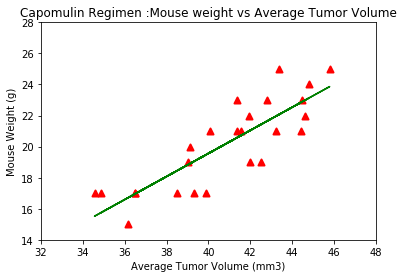

In [60]:
# Linear regression line plotted on second way of plotting the mouse weight vs the tumor volume

m2 = 0.7426941826944178
b2 = -10.148863164111322
x2 = Avg_Cap_TVol['Tumor Volume (mm3)']

y2 = m2*x2 + b2


x_axis2 = Avg_Cap_TVol["Tumor Volume (mm3)"]
Weight1 = Avg_Cap_TVol["Weight (g)"]

fig4, ax4= plt.subplots()


ax4.set_xlim(32,48)
ax4.set_ylim(14,28)
ax4.set_title('Capomulin Regimen :Mouse weight vs Average Tumor Volume')
ax4.set_ylabel('Mouse Weight (g)')
ax4.set_xlabel('Average Tumor Volume (mm3)')

ax4.scatter(x_axis2, Weight1, marker="^",  color="red",linewidth="2")
ax4.plot(Avg_Cap_TVol['Tumor Volume (mm3)'],y2,color="green")
